# Using Machine Learning algorithms to predict diabetes diagnosis

## Appendix

### Apendix A.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

In [2]:
# Read in data

data = pd.read_csv('/Users/tobyjohnstone/Documents/Apprenticeship/2nd Year/Semester 1/Applied Machine Learning/Portfolio Assessment/diabetes2.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Find any nulls or nas

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Find any duplicated values
data.duplicated().sum()

0

### Appendix A.2

In [6]:
#Info on datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This tells us there are some outliers

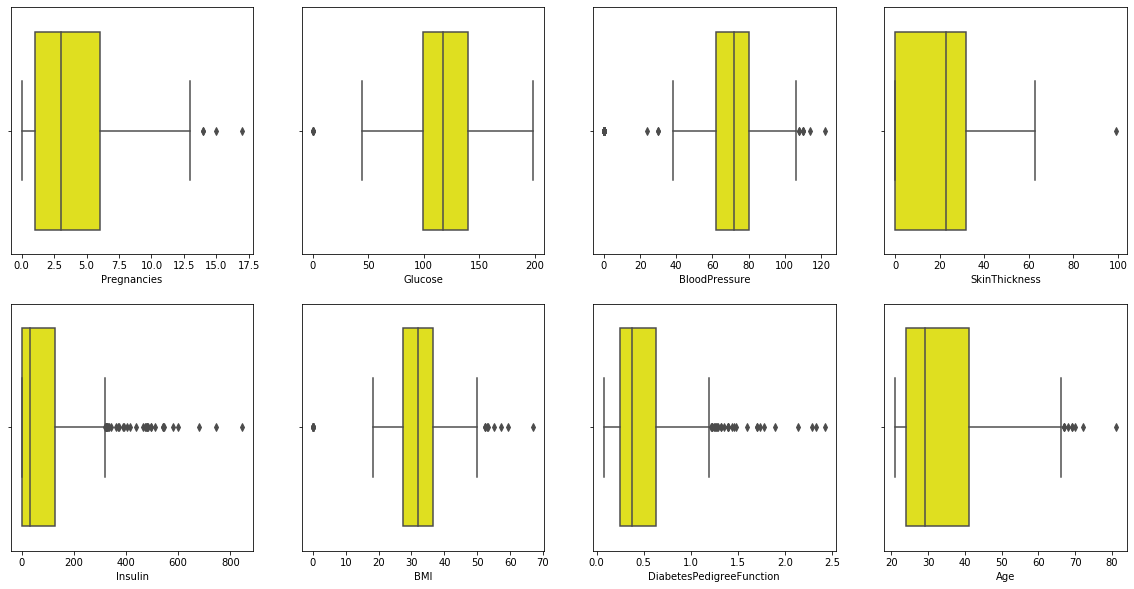

In [8]:
feature = list(data.columns)
feature.remove('Outcome')
plt.figure(figsize=(20,10))
for i in enumerate(feature):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data[i[1]], color='yellow')

### Appendix A.3

In [9]:
def countoutlier(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25) #Inter-quartile range
    ul = (1.5 * iqr) + df[col].quantile(0.75) #upper limit
    ll = df[col].quantile(0.25) - (1.5 * iqr) #lower limit
    print(f'There are {(df[col] > ul).sum()} values greater than Q3 in {col} column')
    print(f'There are {(df[col] < ll).sum()} values less than Q1 in {col} column')
    print('')

In [10]:
for i in data.columns:
    countoutlier(data, i)

There are 4 values greater than Q3 in Pregnancies column
There are 0 values less than Q1 in Pregnancies column

There are 0 values greater than Q3 in Glucose column
There are 5 values less than Q1 in Glucose column

There are 7 values greater than Q3 in BloodPressure column
There are 38 values less than Q1 in BloodPressure column

There are 1 values greater than Q3 in SkinThickness column
There are 0 values less than Q1 in SkinThickness column

There are 34 values greater than Q3 in Insulin column
There are 0 values less than Q1 in Insulin column

There are 8 values greater than Q3 in BMI column
There are 11 values less than Q1 in BMI column

There are 29 values greater than Q3 in DiabetesPedigreeFunction column
There are 0 values less than Q1 in DiabetesPedigreeFunction column

There are 9 values greater than Q3 in Age column
There are 0 values less than Q1 in Age column

There are 0 values greater than Q3 in Outcome column
There are 0 values less than Q1 in Outcome column



In [11]:
def pushoutlier(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    ul = (1.5 * iqr) + df[col].quantile(0.75)
    ll = df[col].quantile(0.25) - (1.5 * iqr)
    df[col][df[col] >  ul] = ul
    df[col][df[col] < ll] = ll


In [12]:
for i in data.columns:
    pushoutlier(data, i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarni

In [13]:
for i in data.columns:
    countoutlier(data, i)

There are 0 values greater than Q3 in Pregnancies column
There are 0 values less than Q1 in Pregnancies column

There are 0 values greater than Q3 in Glucose column
There are 0 values less than Q1 in Glucose column

There are 0 values greater than Q3 in BloodPressure column
There are 0 values less than Q1 in BloodPressure column

There are 0 values greater than Q3 in SkinThickness column
There are 0 values less than Q1 in SkinThickness column

There are 0 values greater than Q3 in Insulin column
There are 0 values less than Q1 in Insulin column

There are 0 values greater than Q3 in BMI column
There are 0 values less than Q1 in BMI column

There are 0 values greater than Q3 in DiabetesPedigreeFunction column
There are 0 values less than Q1 in DiabetesPedigreeFunction column

There are 0 values greater than Q3 in Age column
There are 0 values less than Q1 in Age column

There are 0 values greater than Q3 in Outcome column
There are 0 values less than Q1 in Outcome column



### Appendix A.4

In [14]:
#Looking at the distrubition of the data

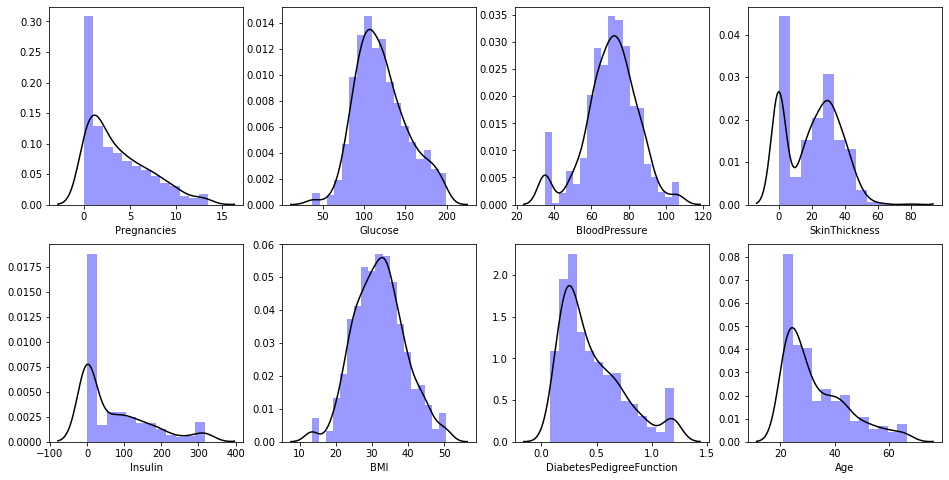

In [15]:
plt.figure(figsize=(16,8))
for i in enumerate(feature):
    plt.subplot(2,4,i[0]+1)
    sns.distplot(data[i[1]], hist=True, color='blue',kde_kws={'color':'black'})

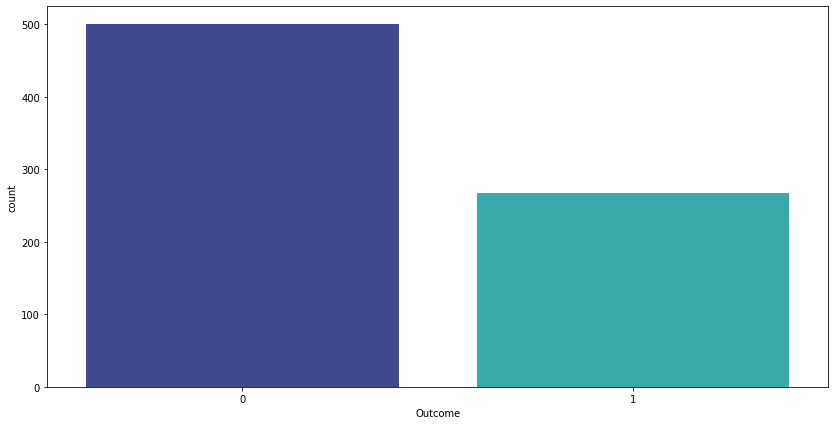

In [16]:
plt.figure(figsize=(14,7))
sns.countplot(data.Outcome, palette='mako', dodge=False, saturation=1.0)

### Appendix A.5

Pearsons correlation matrix 

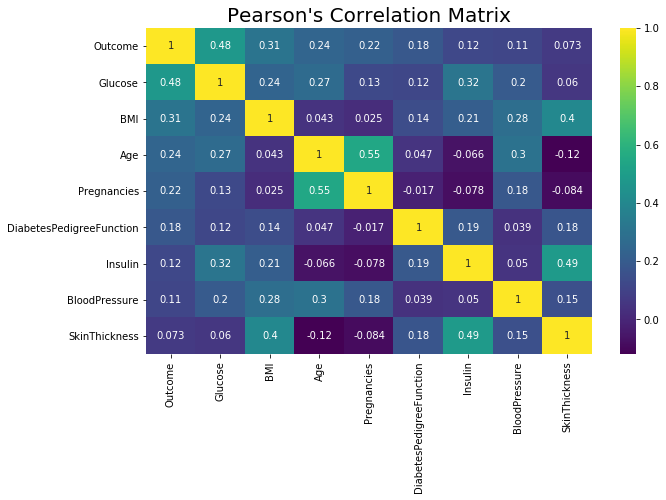

In [17]:
#Pearson correlation matrix
k = data.shape[1] #number of variables for heatmap
cols = data.corr(method='pearson').nlargest(k, data.columns[-1])[data.columns[-1]].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title("Pearson's Correlation Matrix", fontsize=20)
plt.show()

## Appendix B.1

### Splitting for training and test datasets

In [18]:
x = data.drop('Outcome',axis=1)
y = data.Outcome

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=25, test_size =0.2)

In [20]:
smote = SMOTE()
xtrainsmote, ytrainsmote = smote.fit_resample(xtrain, ytrain)

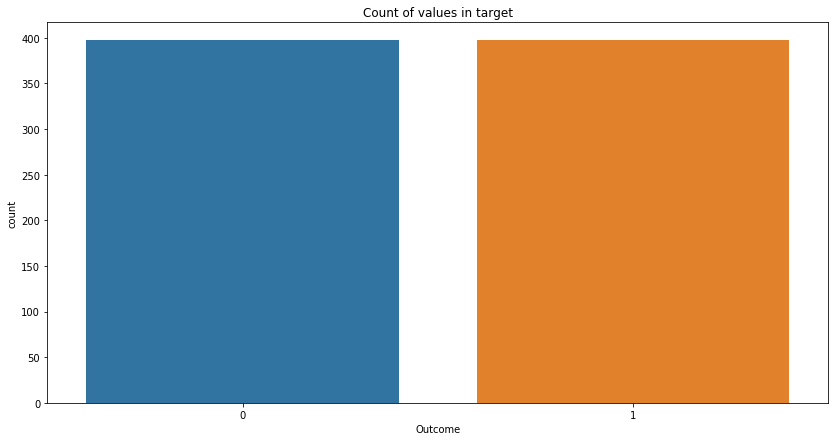

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(ytrainsmote)
plt.title('Count of values in target')
plt.show()

In [22]:
len(ytrainsmote.index)/2

397.0

In [23]:
850+550+300+250+350

2300

## Appendix B.2

In [24]:
classifier=[['Logistic Regression :',LogisticRegression(solver='liblinear')],
       ['Random Forest Regression :',RandomForestClassifier()],
       ['XGboost :' ,XGBClassifier()]
           ]


result = pd.DataFrame(columns = ['Name'])

for name,model in classifier:
    model = model
    model.fit(xtrainsmote,ytrainsmote)
    predictions = model.predict(xtest)
    accuracy_scores = accuracy_score(ytest, predictions)
    precision_scores = precision_score(ytest, predictions)
    recall_scores = recall_score(ytest, predictions)
    f1_scores = f1_score(ytest, predictions)
    result = result.append({'Name' : name, 'Accuracy Score' : accuracy_scores, 'Precision Score' : precision_scores,
                            'Recall Score' : recall_scores, 'F1_scores': f1_scores}, 
                ignore_index = True)
    
result.sort_values(by=['Accuracy Score'],inplace=True, ascending=False)
result.style.hide_index()

Name,Accuracy Score,F1_scores,Precision Score,Recall Score
Random Forest Regression :,0.785714,0.679612,0.673077,0.686275
Logistic Regression :,0.766234,0.672727,0.627119,0.725490
XGboost :,0.766234,0.672727,0.627119,0.725490


## Appendix B.3

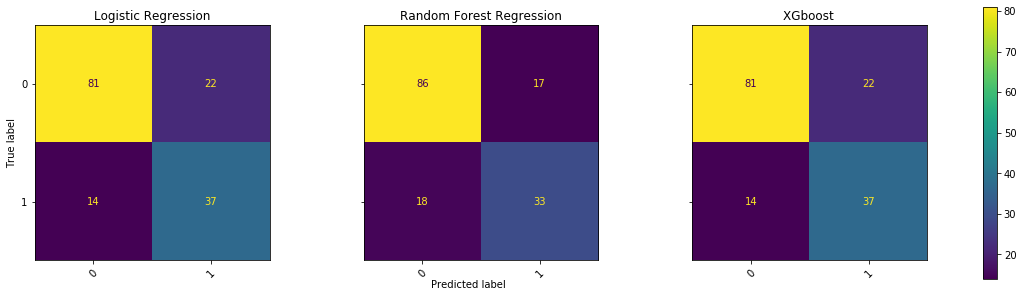

In [25]:
classifiers={
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Random Forest Regression" : RandomForestClassifier(),
    "XGboost ": XGBClassifier()}           


f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (name,model) in enumerate(classifiers.items()):
    model = model
    model.fit(xtrainsmote,ytrainsmote)
    predictions = model.predict(xtest)
    cf_matrix = confusion_matrix(ytest,predictions)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


## Appendix B.4

Logistic regression hyperparameter tuning

In [26]:
param_grid = [    
    {
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }
]

logModel = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 10,verbose=True, n_jobs=-1)

In [27]:
best_clf = clf.fit(xtrainsmote, ytrainsmote)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    9.3s finished


In [28]:
best_clf.best_estimator_

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [29]:
finallr = LogisticRegression(C=1.623776739188721, max_iter=1000, solver='liblinear')

In [30]:
lrfinalmod = finallr.fit(xtrainsmote, ytrainsmote)
preds = lrfinalmod.predict(xtest)

In [31]:
result = pd.DataFrame(columns = ['Name'])
name = 'Logistic Regression'

predictions = model.predict(xtest)
accuracy_scores = accuracy_score(ytest, preds)
precision_scores = precision_score(ytest, preds)
recall_scores = recall_score(ytest, preds)
f1_scores = f1_score(ytest, preds)
result = result.append({'Name' : name, 'Accuracy Score' : accuracy_scores, 'Precision Score' : precision_scores,
                            'Recall Score' : recall_scores, 'F1_scores': f1_scores}, 
                ignore_index = True)
    
result.sort_values(by=['Accuracy Score'],inplace=True, ascending=False)
result.style.hide_index()

Name,Accuracy Score,F1_scores,Precision Score,Recall Score
Logistic Regression,0.766234,0.666667,0.631579,0.705882


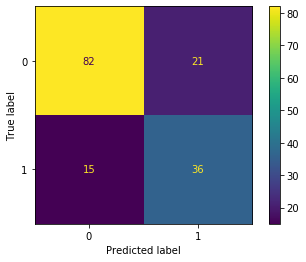

In [32]:
plot_confusion_matrix(lrfinalmod, xtest, ytest)

## Appendix B.5

 For Random Forest

In [33]:
RF = pd.DataFrame()

for i in range(300):
    model = RandomForestClassifier()
    model.fit(xtrainsmote,ytrainsmote)
    predictions = model.predict(xtest)
    accuracy_scoresRF = accuracy_score(ytest, predictions)   
    precision_scoresRF = precision_score(ytest, predictions)
    recall_scoresRF = recall_score(ytest, predictions)
    f1_scoresRF = f1_score(ytest, predictions)
    RF = RF.append({'Accuracy Score' : accuracy_scoresRF, 'Precision Score' : precision_scoresRF,
                            'Recall Score' : recall_scoresRF, 'F1_scores': f1_scoresRF}, 
                ignore_index = True)

RF = RF.describe()
RF.drop(["25%", "50%", "75%"], inplace = True)
RF

,Accuracy Score,F1_scores,Precision Score,Recall Score
count,300.000000,300.000000,300.000000,300.000000
mean,0.787056,0.681279,0.675803,0.687320
std,0.012348,0.018003,0.020891,0.023160
min,0.740260,0.615385,0.603774,0.627451
max,0.824675,0.737864,0.734694,0.745098


## Appendix B.6

For XGBoost

In [34]:
XGBoost = pd.DataFrame()

for i in range(300):
    model = XGBClassifier()
    model.fit(xtrainsmote,ytrainsmote)
    predictions = model.predict(xtest)
    accuracy_scoresXG = accuracy_score(ytest, predictions)   
    precision_scoresXG = precision_score(ytest, predictions)
    recall_scoresXG = recall_score(ytest, predictions)
    f1_scoresXG = f1_score(ytest, predictions)
    XGBoost = XGBoost.append({'Accuracy Score' : accuracy_scoresXG, 'Precision Score' : precision_scoresXG,
                            'Recall Score' : recall_scoresXG, 'F1_scores': f1_scoresXG}, 
                ignore_index = True)
    
XGBoost = XGBoost.describe()
XGBoost.drop(["25%", "50%", "75%"], inplace = True)
XGBoost.round(6)

,Accuracy Score,F1_scores,Precision Score,Recall Score
count,300.000000,300.000000,300.000000,300.00000
mean,0.766234,0.672727,0.627119,0.72549
std,0.000000,0.000000,0.000000,0.00000
min,0.766234,0.672727,0.627119,0.72549
max,0.766234,0.672727,0.627119,0.72549


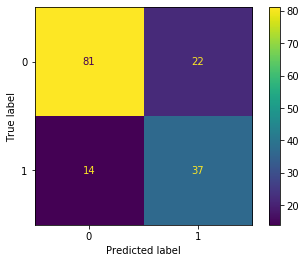

In [35]:
XGBcon = XGBClassifier()
XGBcon = XGBcon.fit(xtrainsmote,ytrainsmote)
plot_confusion_matrix(XGBcon, xtest, ytest)

## Appendix B.7

For Random Forrest

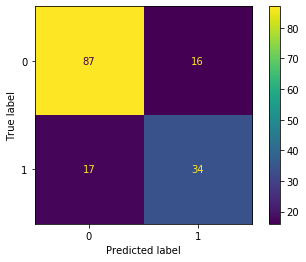

In [36]:
RFCon = RandomForestClassifier()
RFCon = RFCon.fit(xtrainsmote,ytrainsmote)
plot_confusion_matrix(RFCon, xtest, ytest)